# Final Project

In [136]:
from bs4 import BeautifulSoup
import requests as rq
from tqdm import tqdm
import numpy as np
import json
import pandas as pd
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

_domain = 'https://letterboxd.com/'


Finding a list of movies from IMDb that have been released in the past 5 years and have over 100 ratings.

In [137]:
# #moviedb will be a list of lists where each list has a movie's title, year and rating
# moviedb = []

# with open ('top200movies.txt', 'r') as f:
#     top200movies = f.readlines()
#     top200movies = [x.strip() for x in top200movies]
#     for i in range(1,len(top200movies),2):
#         elements = top200movies[i].split('(')
#         title = elements[0].split(".")[1].strip()
#         year = elements[1].split(')')[0]
#         rating = elements[1].split(')')[1].strip()
#         moviedb.append([title, year, rating])

# #convert movie db to pandas dataframe
# df = pd.DataFrame(moviedb, columns = ['Title', 'Year', 'IMDB Rating'])


In [138]:
# response = rq.get(_domain + 'film/' + 'Nomadland')
# html_soup = BeautifulSoup(response.text, 'html.parser')

# print(html_soup)

# # Find the element containing the rating
# data = html_soup.find('meta', {'name': 'twitter:data2'})

# # Extract content from the meta tags
# if data:
#     data_content = data['content']
#     print(f"Data: {data_content}")
# else:
#     print("Meta tags not found.")

In [139]:
# #given the movie in the dataframe, find the rating from letterboxd and add it to the dataframe in a column named letterboxd rating
# def getLetterboxdRating(movie):
#     response = rq.get(_domain + 'film/' + movie)
#     html_soup = BeautifulSoup(response.text, 'html.parser')

#     # Find the element containing the rating
#     data = html_soup.find('meta', {'name': 'twitter:data2'})

#     # Extract content from the meta tags
#     if data:
#         data_content = data['content']
#         return data_content
#     else:
#         return "no rating found"

# #add letterboxd rating to dataframe
# df['Letterboxd Rating'] = df['Title'].apply(getLetterboxdRating)

# #convert letterboxd rating to float
# df['Letterboxd Rating'] = df['Letterboxd Rating'].astype(float)

# #convert imdb rating to float
# df['IMDB Rating'] = df['IMDB Rating'].astype(float)

# #calculate the difference between the two ratings
# df['Difference'] = df['Letterboxd Rating'] - df['IMDB Rating']


In [140]:
# movies_data = pd.read_csv('movies_data.csv')
# print(movies_data.columns)
# movies_data["Rating"] = movies_data["Rating"].astype(float)/100
# movies_data.rename(columns = {'Rating':'Metacritic Rating'}, inplace = True)
# movies_data.rename(columns = {'Movie':'Movie Title'}, inplace = True)
# movies_data['Letterboxd Rating'] = movies_data['Movie Title'].apply(getLetterboxdRating)
# # movies_data['Letterboxd Rating'] = movies_data['Letterboxd Rating'].astype(float)
# # movies_data['Difference'] = movies_data['Letterboxd Rating'] - movies_data['Metacritic Rating']

# print(movies_data)

Index(['movie_title', 'critic_rating', 'Slug', 'critic_reviews', 'lb_rating',
       'year', 'director', 'actors', 'lb_reviews', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western', '20th Century Studios',
       'A24', 'Amazon Studios', 'Anonymous Content', 'BBC Film',
       'Blumhouse Productions', 'Columbia Pictures', 'Legendary Pictures',
       'Lionsgate', 'New Line Cinema', 'Other', 'Paramount', 'STX Films',
       'StudioCanal', 'Universal Pictures', 'Walt Disney Pictures',
       'Warner Bros. Pictures', 'Working Title Films', 'rating_difference'],
      dtype='object')
count    2457.000000
mean       -2.576964
std        10.100426
min       -46.600000
25%        -8.600000
50%        -1.800000
75%         4.600000
max        34.000000
Name: rating_difference, dtype: float64
These are the movies that are most c

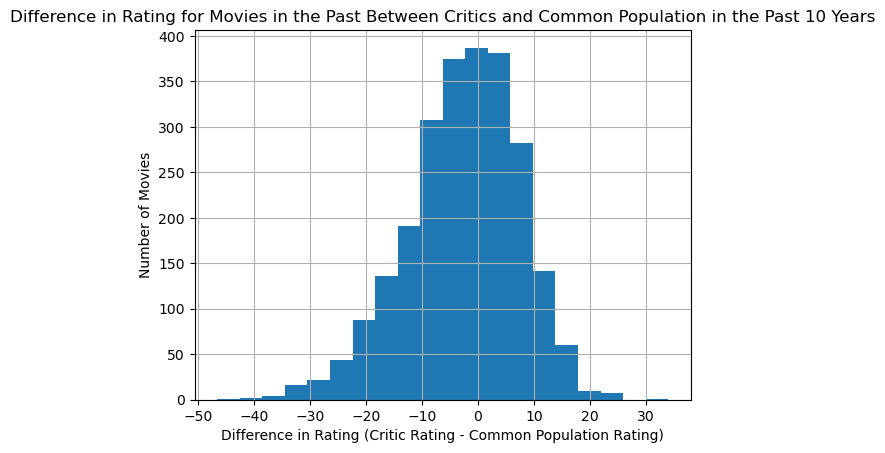

In [141]:
df_10_years = pd.read_csv('massive_data.csv')
df_10_years['rating_difference'] = df_10_years['critic_rating'] - df_10_years['lb_rating']
print(df_10_years.columns)
df_10_years["lb_rating"] = df_10_years["lb_rating"].astype(float)
df_10_years["rating_difference"] = df_10_years["rating_difference"].astype(float)
#print how many movies have a difference that is negative, 0 and positive
print(df_10_years['rating_difference'].describe())

histogram = df_10_years['rating_difference'].hist(bins=20)
histogram.set_xlabel("Difference in Rating (Critic Rating - Common Population Rating)")
histogram.set_ylabel("Number of Movies")
histogram.set_title("Difference in Rating for Movies in the Past Between Critics and Common Population in the Past 10 Years")

#most controversial movies where critics rate movie lower than common population
print("These are the movies that are most controversial where critics rate the movie lower than the common population")
print(df_10_years.sort_values(by=['rating_difference'])['movie_title'].head(10).to_list())
critic_rating_lower = df_10_years.sort_values(by=['rating_difference'])['movie_title'].head(10).to_list()

#most controversial movies where critics rate movie higher than common population
print("These are the movies that are most controversial where critics rate the movie higher than the common population")
print(df_10_years.sort_values(by=['rating_difference'], ascending=False)['movie_title'].head(10).to_list())
critic_rating_higher = df_10_years.sort_values(by=['rating_difference'], ascending=False)['movie_title'].head(10).to_list()

#movies that are rated the same by critics and common population
print("These are the movies that are rated the same by critics and common population")
print(df_10_years[df_10_years['rating_difference'] == 0]['movie_title'].to_list())

#count how many movies are rated the same by critics and common population
print("This is the number of movies that are rated the same by critics and common population")
print(df_10_years[df_10_years['rating_difference'] == 0]['movie_title'].count())

#count how many movies are rated higher by critics
print("This is the number of movies that are rated higher by critics")
print(df_10_years[df_10_years['rating_difference'] > 0]['movie_title'].count())

#count how many movies are rated lower by critics
print("This is the number of movies that are rated lower by critics")
print(df_10_years[df_10_years['rating_difference'] < 0]['movie_title'].count())

In [142]:
new_df = pd.read_csv('biggest_data.csv')

#change rating column to be named critic_rating
new_df.rename(columns = {'Rating':'critic_rating'}, inplace = True)
new_df.rename(columns = {'Movie':'movie_title'}, inplace = True)
new_df.rename(columns = {'Critic Reviews':'critic_reviews'}, inplace = True)

#go through review columns and make sure all of the letters are lowercase, are normal characters and words, remove spaces and remove punctuation
new_df['critic_reviews'] = new_df['critic_reviews'].str.lower()
new_df['critic_reviews'] = new_df['critic_reviews'].str.replace('[^\w\s]','')
new_df['critic_reviews'] = new_df['critic_reviews'].str.strip()

#convert new df to csv
new_df.to_csv('enormous_data.csv')

print(new_df.columns)



/var/folders/xv/l4rwh8q55z9b_5vp37qn2g600000gn/T/ipykernel_74012/449180203.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['critic_reviews'] = new_df['critic_reviews'].str.replace('[^\w\s]','')


Index(['movie_title', 'critic_rating', 'Slug', 'critic_reviews', 'lb_rating',
       'genre', 'year', 'director', 'actors', 'production_companies',
       'lb_reviews'],
      dtype='object')


In [143]:
# pip install wordcloud

In [144]:
df = pd.read_csv('massive_data.csv')
df['critic_rating'] = df['critic_rating'].astype(float)/100
df['lb_rating'] = df['lb_rating'].astype(float)/100
df['year'] = df['year'].astype(float)-2013 #making sure years are 1 to 9 instead of 2013 to 2023
df['rating_difference'] = df['critic_rating'] - df['lb_rating']

features = df.columns.to_list()
features.remove('critic_rating')
features.remove('lb_rating')
features.remove('movie_title')
features.remove('actors')
features.remove('Slug')
features.remove('director')

#one_hot encode director column
# df = pd.concat([df, pd.get_dummies(df['director'])], axis=1)
# features.remove('director')
# #create column names for one_hot encoded director column
# director_columns = pd.get_dummies(df['director']).columns.to_list()
# features = features + director_columns

df
print(df.columns)


Index(['movie_title', 'critic_rating', 'Slug', 'critic_reviews', 'lb_rating',
       'year', 'director', 'actors', 'lb_reviews', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western', '20th Century Studios',
       'A24', 'Amazon Studios', 'Anonymous Content', 'BBC Film',
       'Blumhouse Productions', 'Columbia Pictures', 'Legendary Pictures',
       'Lionsgate', 'New Line Cinema', 'Other', 'Paramount', 'STX Films',
       'StudioCanal', 'Universal Pictures', 'Walt Disney Pictures',
       'Warner Bros. Pictures', 'Working Title Films', 'rating_difference'],
      dtype='object')


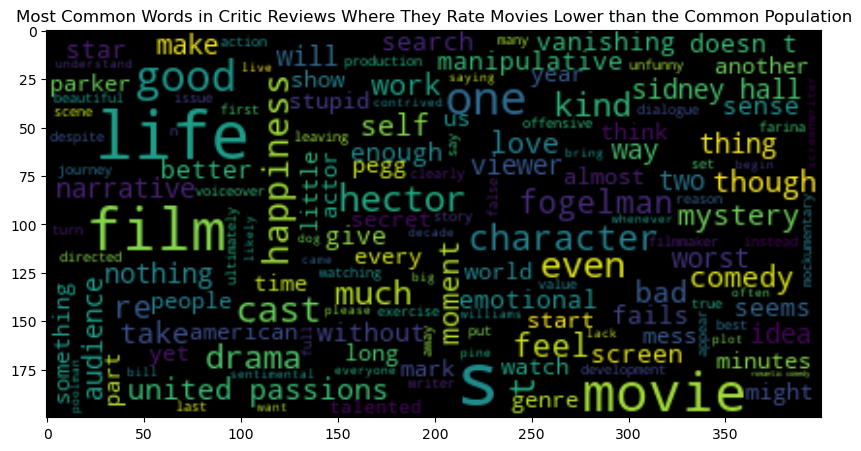

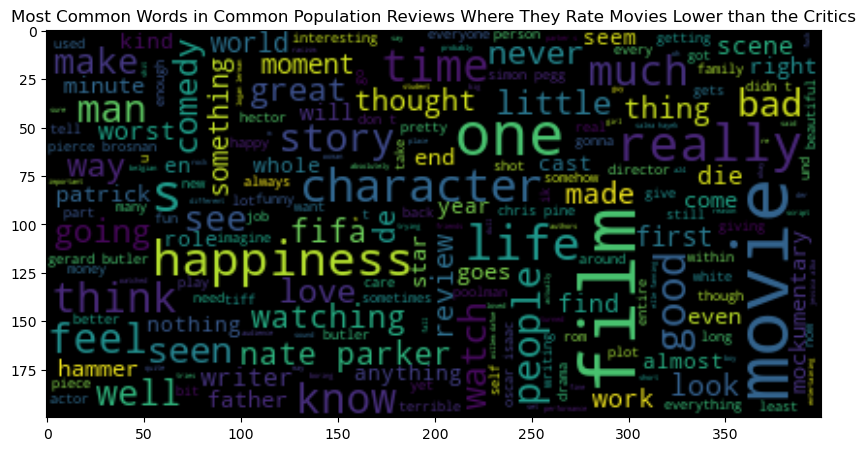

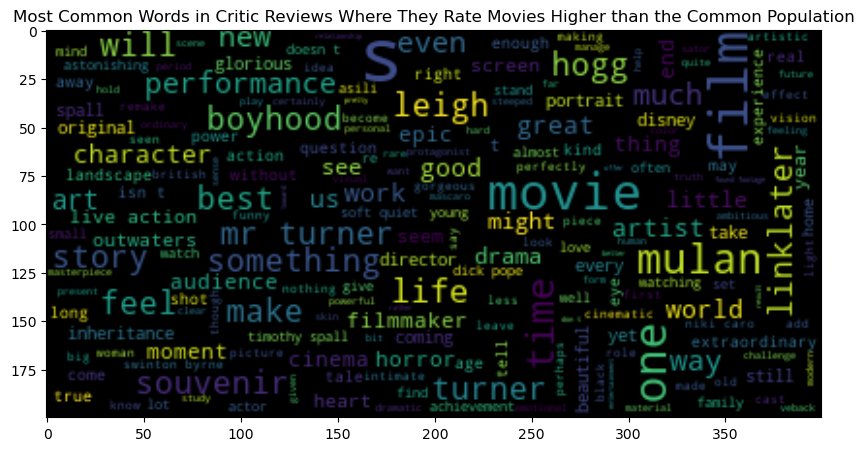

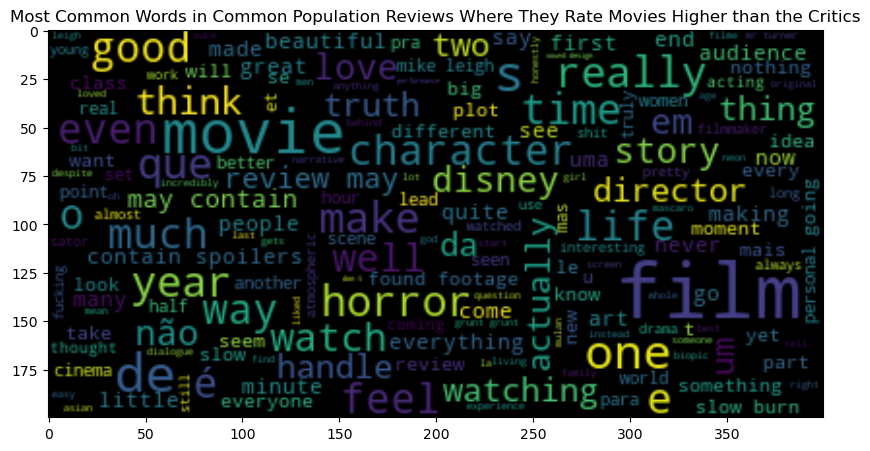

In [145]:
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

def plot_faction(long_string, title):
    wc = WordCloud(max_font_size=40).generate(long_string)
    plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(title)
    plt.show()

long_string = ""
lb_string = ""
for movie in critic_rating_lower:
    #find the reviews for the movie title
    reviews = df[df['movie_title'] == movie]['critic_reviews'].to_list()
    reviews_lb = df[df['movie_title'] == movie]['lb_reviews'].to_list()
    #convert reviews into long string
    for review in reviews:
        long_string += review + " "
    for review in reviews_lb:
        lb_string += review + " "

plot_faction(long_string, "Most Common Words in Critic Reviews Where They Rate Movies Lower than the Common Population")
plot_faction(lb_string, "Most Common Words in Common Population Reviews Where They Rate Movies Lower than the Critics")
    
long_string = ""
lb_string = ""
for movie in critic_rating_higher:
    #find the reviews for the movie title
    reviews = df[df['movie_title'] == movie]['critic_reviews'].to_list()
    reviews_lb = df[df['movie_title'] == movie]['lb_reviews'].to_list()
    #convert reviews into long string
    for review in reviews:
        long_string += review + " "
    for review in reviews_lb:
        lb_string += review + " "

plot_faction(long_string, "Most Common Words in Critic Reviews Where They Rate Movies Higher than the Common Population")
plot_faction(lb_string, "Most Common Words in Common Population Reviews Where They Rate Movies Higher than the Critics")

Epoch 1/20
27/27 [==============================] - 3s 87ms/step - loss: 0.1300 - mae: 0.2740 - val_loss: 0.0513 - val_mae: 0.2057
Epoch 2/20
27/27 [==============================] - 2s 79ms/step - loss: 0.0182 - mae: 0.1083 - val_loss: 0.0774 - val_mae: 0.2619
Epoch 3/20
27/27 [==============================] - 2s 79ms/step - loss: 0.0150 - mae: 0.0984 - val_loss: 0.0822 - val_mae: 0.2702
Epoch 4/20
27/27 [==============================] - 2s 79ms/step - loss: 0.0115 - mae: 0.0866 - val_loss: 0.0738 - val_mae: 0.2526
Epoch 5/20
27/27 [==============================] - 2s 79ms/step - loss: 0.0108 - mae: 0.0833 - val_loss: 0.0817 - val_mae: 0.2669
Epoch 6/20
27/27 [==============================] - 2s 78ms/step - loss: 0.0098 - mae: 0.0786 - val_loss: 0.0708 - val_mae: 0.2442
Epoch 7/20
27/27 [==============================] - 2s 79ms/step - loss: 0.0094 - mae: 0.0775 - val_loss: 0.0908 - val_mae: 0.2814
Epoch 8/20
27/27 [==============================] - 2s 79ms/step - loss: 0.0087 - m

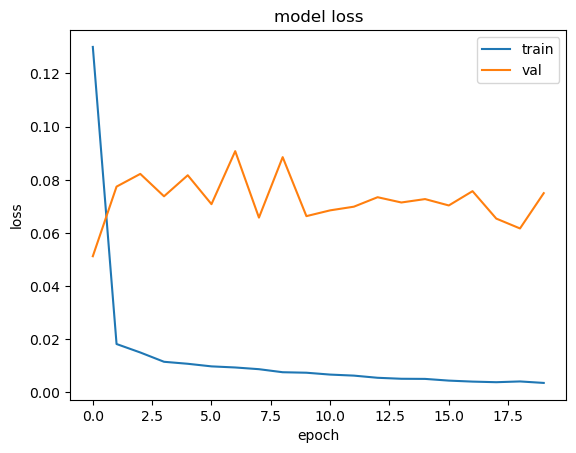

16/16 [==============================] - 0s 13ms/step - loss: 0.0237 - mae: 0.0998
Mean Squared Error on Test Set: 0.023665087297558784
Mean Absolute Error on Test Set: 0.0998305156826973


In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Load your dataset and preprocess it as needed
# Assuming 'data' contains your dataset

# Tokenize and pad the text data
tokenizer = Tokenizer(num_words=1000)  # Define the maximum vocabulary size
tokenizer.fit_on_texts(df['critic_reviews'])
sequences = tokenizer.texts_to_sequences(df['critic_reviews'])
X_text = pad_sequences(sequences, maxlen=100)  # Define the maximum sequence length

# Splitting data into features (text data) and target variable (ratings)
# Assuming 'ratings' column contains the continuous ratings
y = df['critic_rating']

# Define and build the neural network model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128, input_length=100))
model.add(LSTM(128))  # LSTM layer for text processing
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))  # Additional dense layer for combining text features
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_text, y, epochs=20, batch_size=64, validation_split=0.3)

#graph losses over time
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")
print(f"Mean Absolute Error on Test Set: {mae}")


Epoch 1/20
27/27 [==============================] - 3s 87ms/step - loss: 0.0943 - mae: 0.2289 - val_loss: 0.0295 - val_mae: 0.1484
Epoch 2/20
27/27 [==============================] - 2s 80ms/step - loss: 0.0114 - mae: 0.0843 - val_loss: 0.0276 - val_mae: 0.1426
Epoch 3/20
27/27 [==============================] - 2s 80ms/step - loss: 0.0085 - mae: 0.0716 - val_loss: 0.0261 - val_mae: 0.1378
Epoch 4/20
27/27 [==============================] - 2s 80ms/step - loss: 0.0074 - mae: 0.0684 - val_loss: 0.0229 - val_mae: 0.1266
Epoch 5/20
27/27 [==============================] - 2s 81ms/step - loss: 0.0068 - mae: 0.0662 - val_loss: 0.0196 - val_mae: 0.1150
Epoch 6/20
27/27 [==============================] - 2s 81ms/step - loss: 0.0063 - mae: 0.0634 - val_loss: 0.0241 - val_mae: 0.1299
Epoch 7/20
27/27 [==============================] - 2s 80ms/step - loss: 0.0058 - mae: 0.0596 - val_loss: 0.0240 - val_mae: 0.1291
Epoch 8/20
27/27 [==============================] - 2s 80ms/step - loss: 0.0051 - m

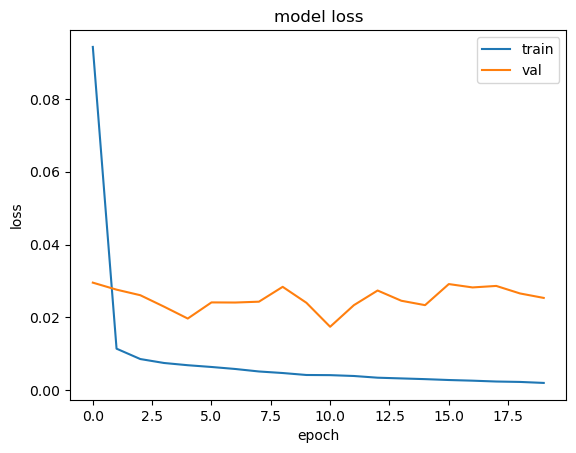

16/16 [==============================] - 0s 13ms/step - loss: 0.0092 - mae: 0.0650
Mean Squared Error on Test Set: 0.009208230301737785
Mean Absolute Error on Test Set: 0.06498002260923386


In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Load your dataset and preprocess it as needed
# Assuming 'data' contains your dataset

# Tokenize and pad the text data
tokenizer = Tokenizer(num_words=1000)  # Define the maximum vocabulary size
tokenizer.fit_on_texts(df['lb_reviews'])
sequences = tokenizer.texts_to_sequences(df['lb_reviews'])
X_text = pad_sequences(sequences, maxlen=100)  # Define the maximum sequence length

# Splitting data into features (text data) and target variable (ratings)
# Assuming 'ratings' column contains the continuous ratings
y = df['lb_rating']

# Define and build the neural network model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=128, input_length=100))
model.add(LSTM(128))  # LSTM layer for text processing
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))  # Additional dense layer for combining text features
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_text, y, epochs=20, batch_size=64, validation_split=0.3)

#graph losses over time
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")
print(f"Mean Absolute Error on Test Set: {mae}")


In [148]:
# # pip install nltk
# import nltk
# nltk.download('vader_lexicon')

In [149]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import os

def get_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores
import pandas as pd

# Initialize empty lists to store data
data = {
    'Movie Title': [],
    'Critic Rating Higher or Lower': [],
    'Sentiment': []
}

# Loop through movies with higher critic ratings
for movie in critic_rating_higher:
    movie_reviews = df[df['movie_title'] == movie]['critic_reviews'].tolist()
    num_reviews = len(movie_reviews)
    data['Movie Title'].append(movie)
    data['Critic Rating Higher or Lower'].append('higher')
    sentiments = [get_sentiment(review) for review in movie_reviews]
    data['Sentiment'].append(sentiments)

# Loop through movies with lower critic ratings
for movie in critic_rating_lower:
    movie_reviews = df[df['movie_title'] == movie]['critic_reviews'].tolist()
    num_reviews = len(movie_reviews)
    data['Movie Title'].append(movie)
    data['Critic Rating Higher or Lower'].append('lower')
    sentiments = [get_sentiment(review) for review in movie_reviews]
    data['Sentiment'].append(sentiments)

# Create a DataFrame from the collected data
results_df = pd.DataFrame(data)

# Extracting sentiment scores from the list and creating separate columns
results_df['neg'] = results_df['Sentiment'].apply(lambda x: x[0]['neg'])
results_df['neu'] = results_df['Sentiment'].apply(lambda x: x[0]['neu'])
results_df['pos'] = results_df['Sentiment'].apply(lambda x: x[0]['pos'])
results_df['compound'] = results_df['Sentiment'].apply(lambda x: x[0]['compound'])

# Drop the original 'Sentiment' column
results_df.drop('Sentiment', axis=1, inplace=True)

# Convert to CSV
results_df.to_csv('sentiment.csv', index=False)

# Display the DataFrame
# print(results_df)


#for all movies rated higher by critics find averages of sentiments
print("These are the average sentiments for movies rated higher by critics")
print(results_df[results_df['Critic Rating Higher or Lower'] == 'higher'].mean())

#for all movies rated lower by critics find averages of sentiments
print("These are the average sentiments for movies rated lower by critics")
print(results_df[results_df['Critic Rating Higher or Lower'] == 'lower'].mean())


These are the average sentiments for movies rated higher by critics
neg         0.08220
neu         0.74910
pos         0.16850
compound    0.57175
dtype: float64
These are the average sentiments for movies rated lower by critics
neg         0.10080
neu         0.74300
pos         0.15620
compound    0.40333
dtype: float64


/var/folders/xv/l4rwh8q55z9b_5vp37qn2g600000gn/T/ipykernel_74012/90527008.py:57: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(results_df[results_df['Critic Rating Higher or Lower'] == 'higher'].mean())
/var/folders/xv/l4rwh8q55z9b_5vp37qn2g600000gn/T/ipykernel_74012/90527008.py:61: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(results_df[results_df['Critic Rating Higher or Lower'] == 'lower'].mean())


In [150]:
df.columns

Index(['movie_title', 'critic_rating', 'Slug', 'critic_reviews', 'lb_rating',
       'year', 'director', 'actors', 'lb_reviews', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western', '20th Century Studios',
       'A24', 'Amazon Studios', 'Anonymous Content', 'BBC Film',
       'Blumhouse Productions', 'Columbia Pictures', 'Legendary Pictures',
       'Lionsgate', 'New Line Cinema', 'Other', 'Paramount', 'STX Films',
       'StudioCanal', 'Universal Pictures', 'Walt Disney Pictures',
       'Warner Bros. Pictures', 'Working Title Films', 'rating_difference'],
      dtype='object')

In [151]:
#map reduce section with ratings for production companies over time 
#remove rows from the dataframe that have no production company (1 in other)

df = df[df['Other'] != 1]
#where there is a 1 in any of these columns 
companies = ['20th Century Studios',
       'A24', 'Amazon Studios', 'Anonymous Content', 'BBC Film',
       'Blumhouse Productions', 'Columbia Pictures', 'Legendary Pictures',
       'Lionsgate', 'New Line Cinema', 'Other', 'Paramount', 'STX Films',
       'StudioCanal', 'Universal Pictures', 'Walt Disney Pictures',
       'Warner Bros. Pictures', 'Working Title Films']

#if there is a 1 in the column for companies then make the production company that company
for company in companies:
    df.loc[df[company] == 1, 'production_company'] = company

print(df['production_company'].value_counts())

Universal Pictures       32
Walt Disney Pictures     29
Columbia Pictures        22
Paramount                21
A24                      20
Warner Bros. Pictures    19
New Line Cinema          17
BBC Film                 16
Lionsgate                16
Amazon Studios           14
STX Films                12
Anonymous Content        11
StudioCanal              11
20th Century Studios     10
Legendary Pictures       10
Working Title Films      10
Blumhouse Productions    10
Name: production_company, dtype: int64


In [152]:
import pandas as pd

# Assuming 'df' contains your DataFrame

# Remove rows with no production company
df = df[df['Other'] != 1]

# List of production company columns
companies = ['20th Century Studios', 'A24', 'Amazon Studios', 'Anonymous Content', 'BBC Film',
             'Blumhouse Productions', 'Columbia Pictures', 'Legendary Pictures', 'Lionsgate',
             'New Line Cinema', 'Other', 'Paramount', 'STX Films', 'StudioCanal',
             'Universal Pictures', 'Walt Disney Pictures', 'Warner Bros. Pictures',
             'Working Title Films']

# Initialize lists to store map results
mapped_data = []

# Iterate through each company and perform map step
for company in companies:
    # Filter rows where the company has produced a movie
    company_data = df[df[company] == 1]
    
    # Group by production company and aggregate movie titles, years, and ratings
    grouped_data = company_data.groupby('production_company').agg({
        'movie_title': lambda x: list(x),
        'year': lambda x: list(x),
        'critic_rating': lambda x: list(x)
    }).reset_index()
    
    # Create tuples of company name and aggregated data
    mapped_data.extend([(company, movie, year, rating)
                        for company, movies, years, ratings in zip(
                            grouped_data['production_company'],
                            grouped_data['movie_title'],
                            grouped_data['year'],
                            grouped_data['critic_rating']
                        )
                        for movie, year, rating in zip(movies, years, ratings)])

# Perform reduce step by aggregating data based on production company
reduced_data = {}
for company, movie, year, rating in mapped_data:
    if company not in reduced_data:
        reduced_data[company] = {'movies': [], 'years': [], 'ratings': []}
    reduced_data[company]['movies'].append(movie)
    reduced_data[company]['years'].append(year)
    reduced_data[company]['ratings'].append(rating)

# Print or further process reduced_data
for company, data in reduced_data.items():
    print(f"Production Company: {company}")
    print(f"Movies: {data['movies']}")
    print(f"Years: {data['years']}")
    print(f"Ratings: {data['ratings']}")


# Convert to DataFrame
data_list = []
for company, data in reduced_data.items():
    for movie, year, rating in zip(data['movies'], data['years'], data['ratings']):
        data_list.append([company, movie, year, rating])

# Create DataFrame
df = pd.DataFrame(data_list, columns=['Production Company', 'Movie', 'Year', 'Rating'])

# Save to CSV
df.to_csv('ratings_over_time.csv', index=False)
print("CSV file created: 'ratings_over_time.csv'")


Production Company: 20th Century Studios
Movies: ['West Side Story', "The Bob's Burgers Movie", 'Avatar: The Way of Water', 'A Haunting in Venice', 'No One Will Save You', 'Quiz Lady', 'Darby and the Dead', 'The New Mutants', 'Vacation Friends 2', 'Home Sweet Home Alone']
Years: [8.0, 9.0, 9.0, 10.0, 10.0, 10.0, 9.0, 7.0, 10.0, 8.0]
Ratings: [0.85, 0.75, 0.67, 0.63, 0.6, 0.59, 0.51, 0.43, 0.38, 0.35]
Production Company: A24
Movies: ['Moonlight', 'The Zone of Interest', 'Past Lives', 'Eighth Grade', 'All Dirt Roads Taste of Salt', 'The Green Knight', 'Earth Mama', "C'mon C'mon", 'Everything Everywhere All at Once', 'X', 'After Yang', 'It Comes at Night', 'The Humans', 'Pearl', 'Problemista', 'Dream Scenario', 'The Deepest Breath', 'Bodies Bodies Bodies', 'Beau Is Afraid', 'The Whale']
Years: [3.0, 10.0, 10.0, 5.0, 10.0, 8.0, 10.0, 8.0, 9.0, 9.0, 8.0, 4.0, 8.0, 9.0, 10.0, 10.0, 10.0, 9.0, 10.0, 9.0]
Ratings: [0.99, 0.95, 0.94, 0.87, 0.86, 0.85, 0.85, 0.82, 0.81, 0.79, 0.78, 0.78, 0.78, 0

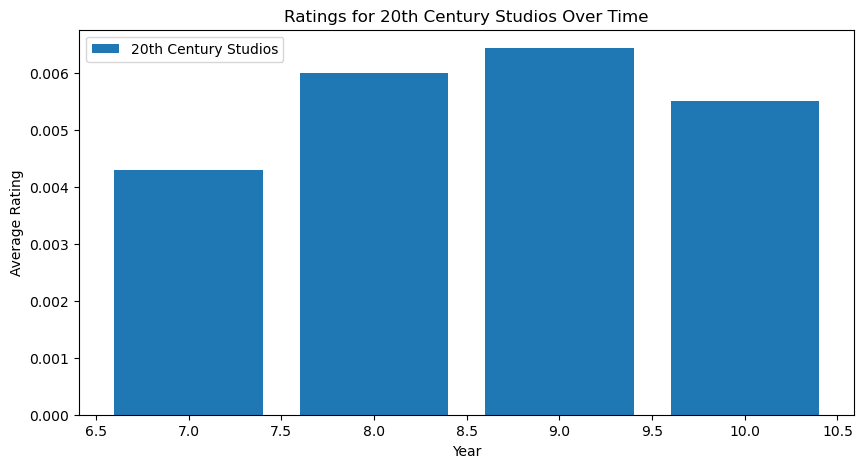

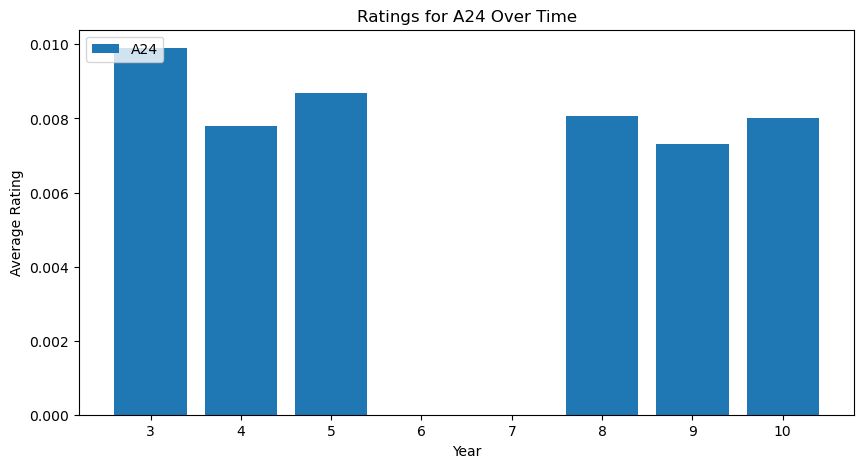

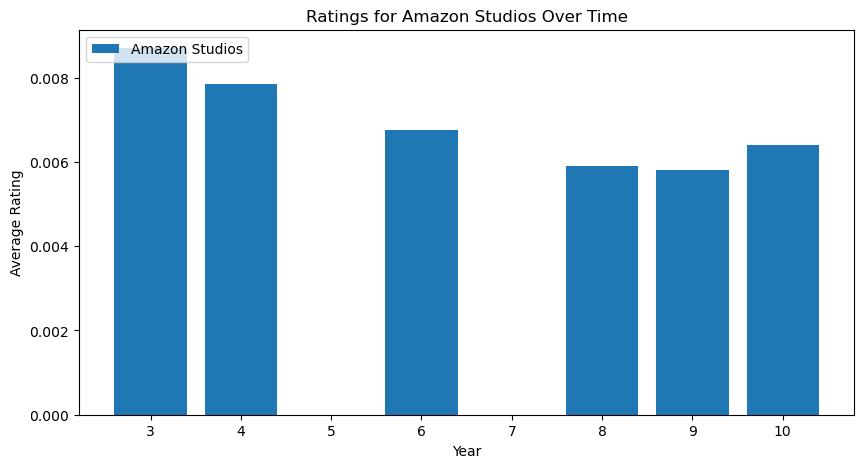

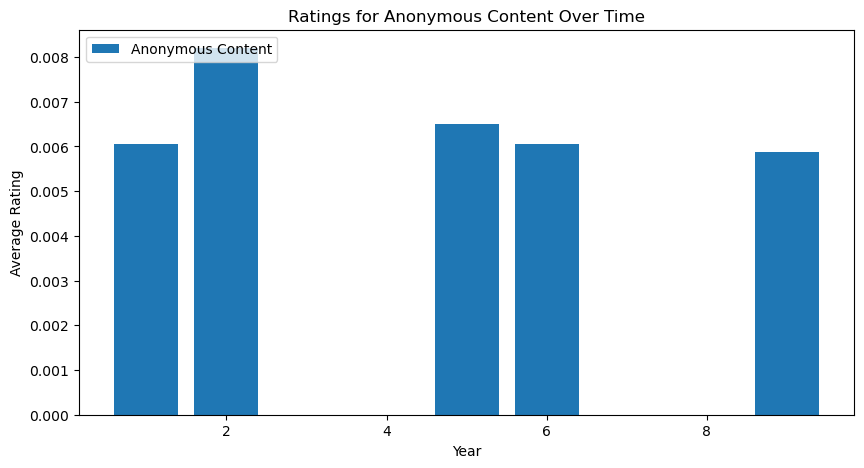

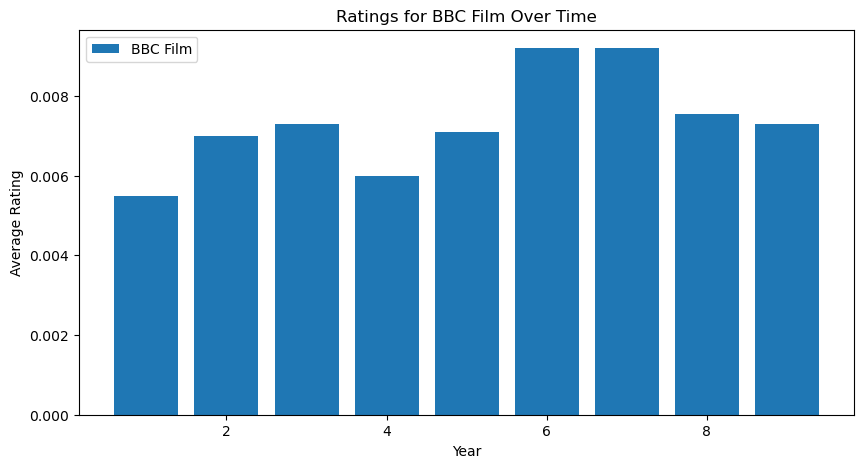

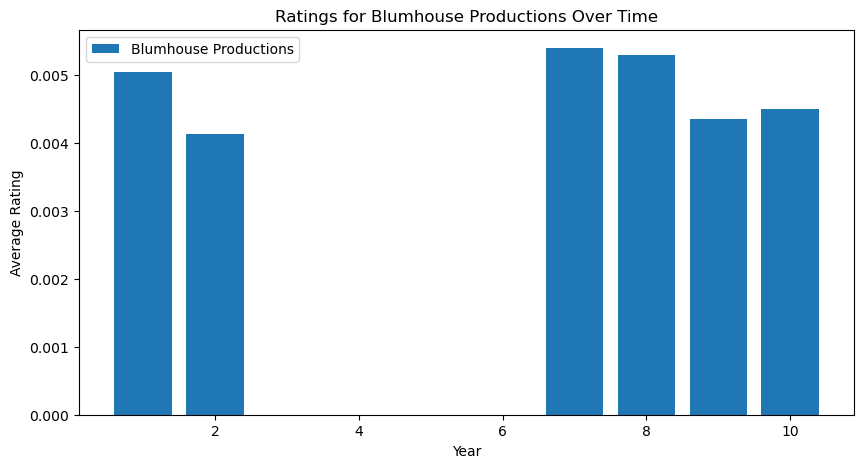

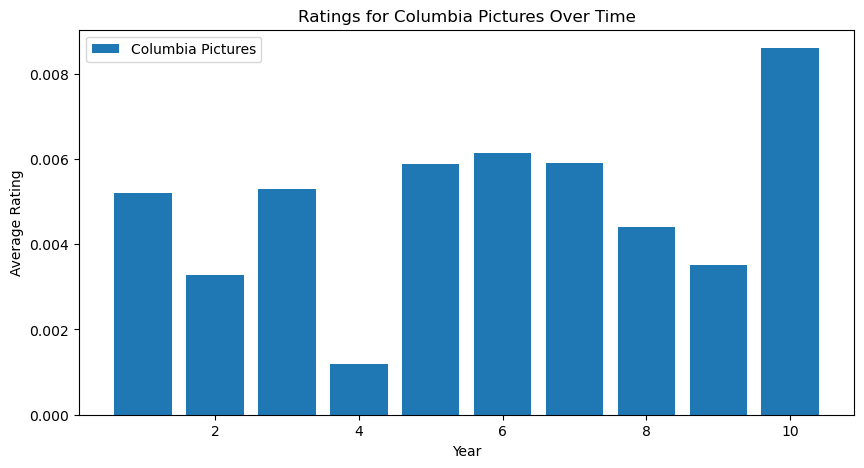

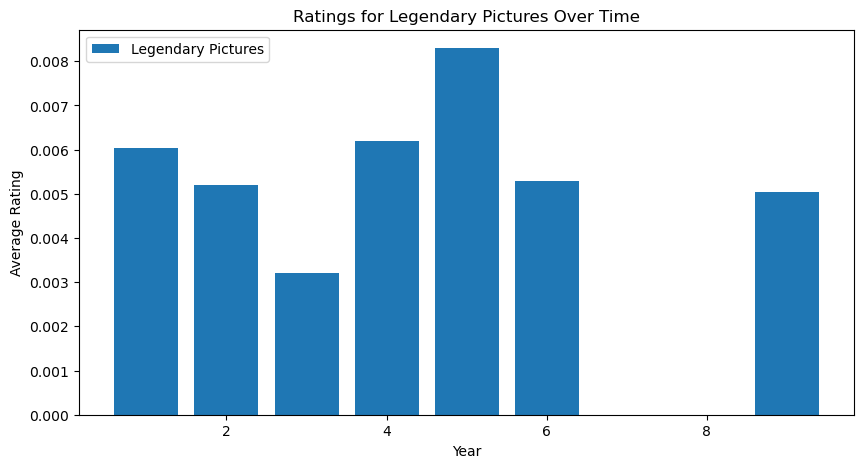

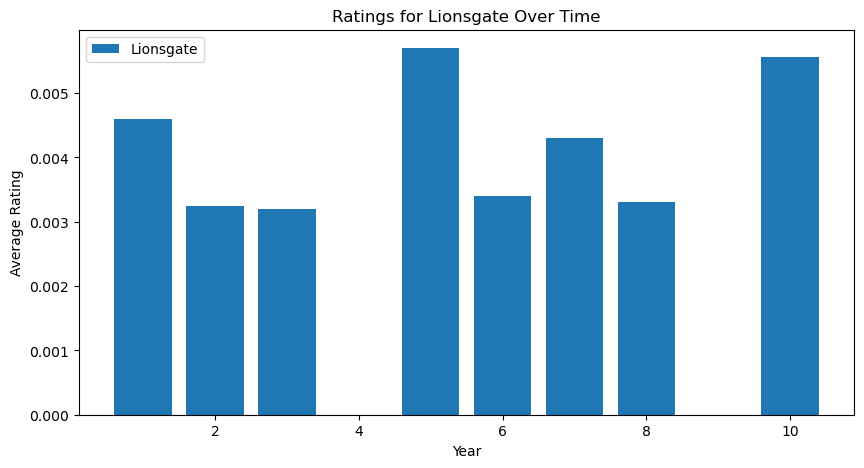

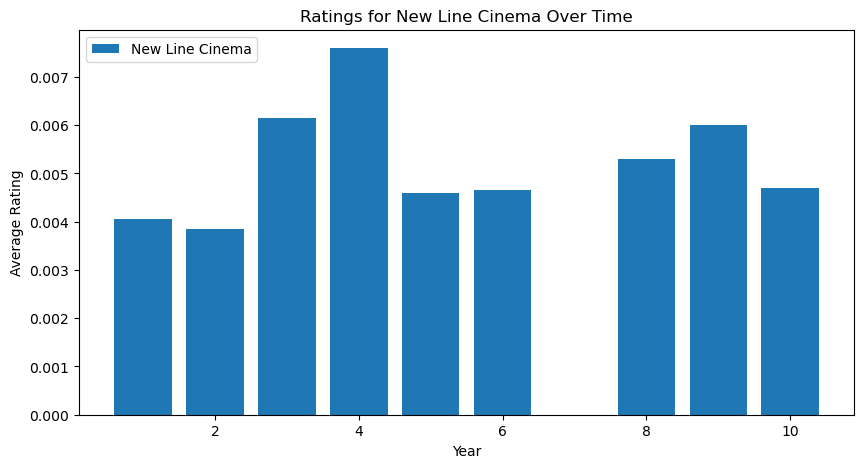

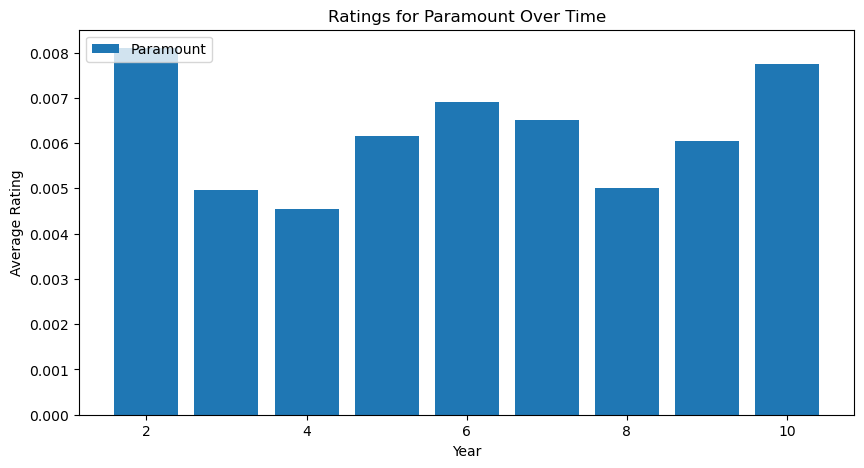

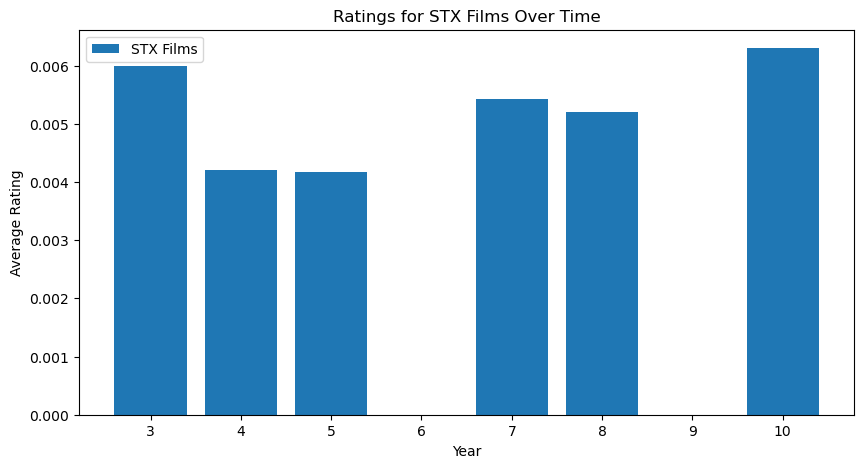

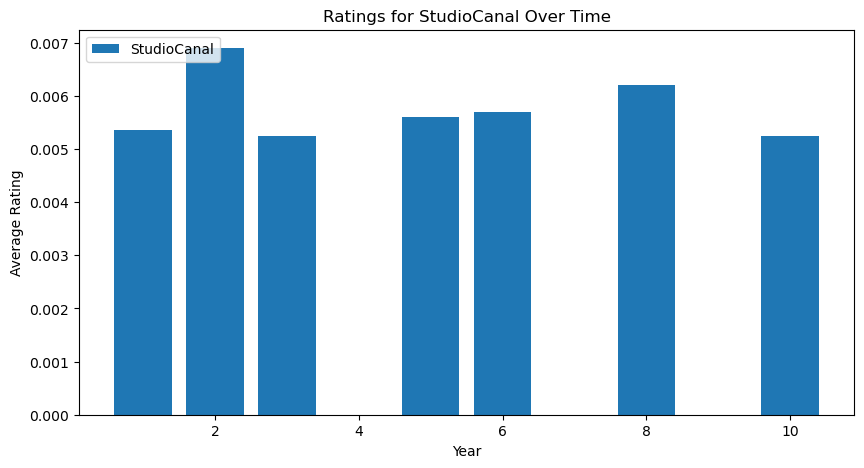

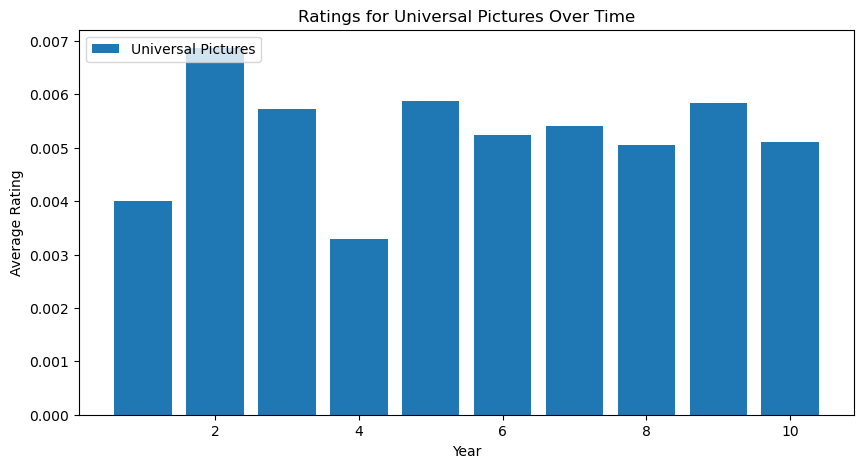

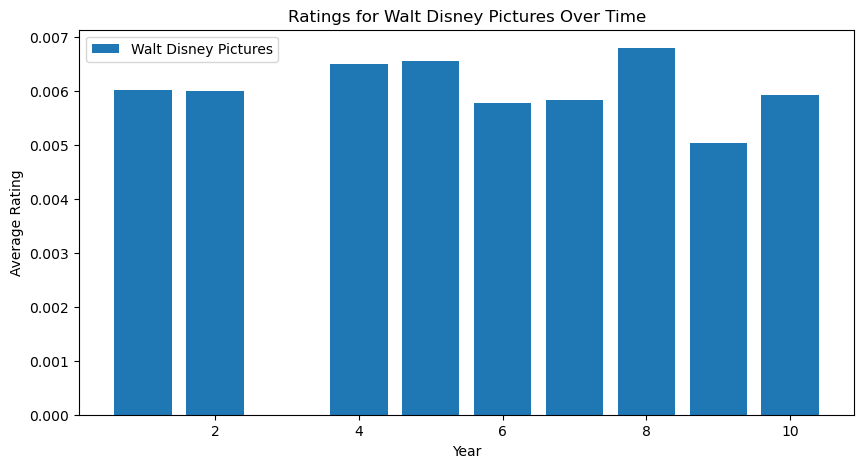

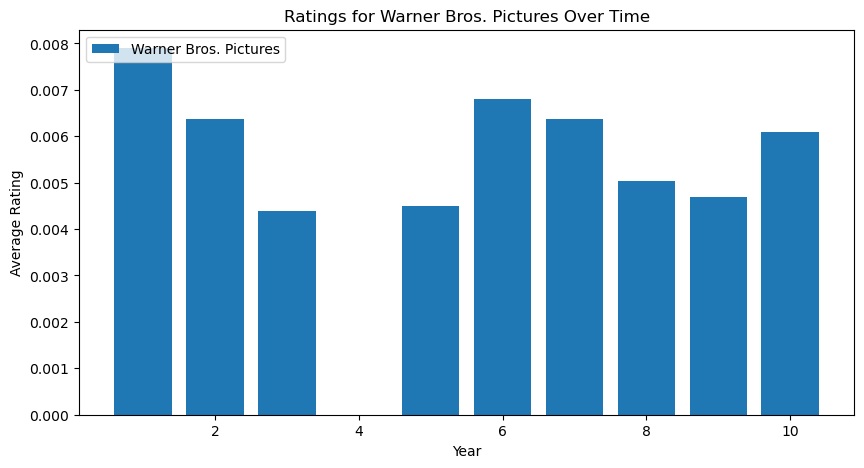

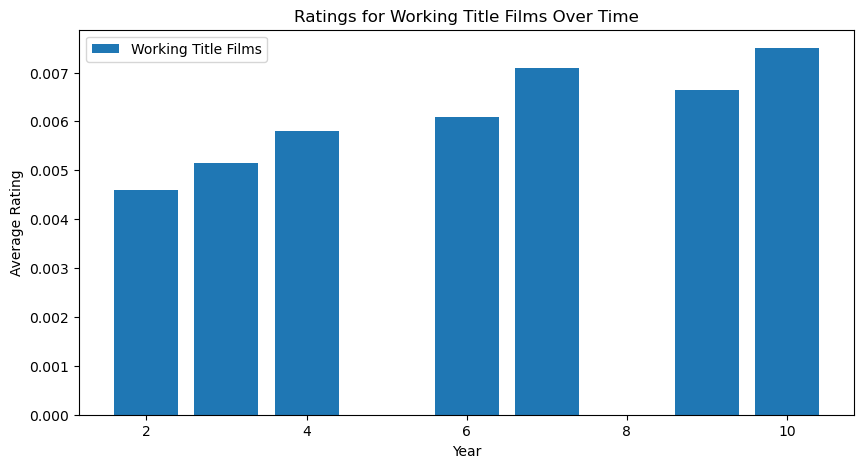

In [153]:
import matplotlib.pyplot as plt
import numpy as np

for company, data in reduced_data.items():
    plt.figure(figsize=(10, 5))
    data['ratings'] = np.array(data['ratings']) / 100

    # Calculate average rating for each year
    avg_ratings = {}
    for year, ratings in zip(data['years'], data['ratings']):
        if year not in avg_ratings:
            avg_ratings[year] = []
        avg_ratings[year].append(ratings)

    years = sorted(avg_ratings.keys())
    avg_ratings = [np.mean(avg_ratings[year]) for year in years]

    plt.bar(years, avg_ratings, label=company)
    hfont = {'fontname':'Avenir'}
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.title(f'Ratings for {company} Over Time')

plt.show()
